##**Load the Stanford Dogs Dataset**

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pickle
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset, info = tfds.load(name="stanford_dogs", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete9R5L1N/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete9R5L1N/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [ ]:
IMG_LEN = 299
IMG_SHAPE = (IMG_LEN, IMG_LEN, 3)
N_BREEDS = 120

training_data = dataset['train']
test_data = dataset['test']

##**Extract pictures and labels and save them as pickle objs**

In [ ]:
distribution_of_labels = []
train_x = []
train_y = []

In [ ]:
for x in training_data.skip(0):
  if list.count(distribution_of_labels, x['label'].numpy()) == 7 :
    continue
  img = x['image'] / 255
  img = tf.image.resize(img, (IMG_LEN, IMG_LEN), method='nearest')
  train_x.append(np.array(img))
  distribution_of_labels.append(x['label'].numpy())
  label = tf.one_hot(np.array(x['label']),N_BREEDS)
  train_y.append(label)

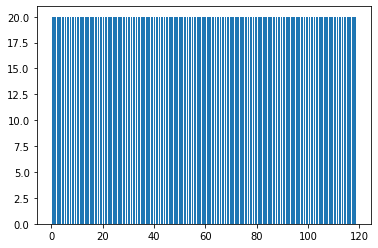

In [ ]:

plt.hist(distribution_of_labels, bins=120 ,rwidth=0.7);

In [ ]:
for x in range(120):
  print(f'{x} occurs {list.count(distribution_of_labels, x)} times')

0 occurs 20 times
1 occurs 20 times
2 occurs 20 times
3 occurs 20 times
4 occurs 20 times
5 occurs 20 times
6 occurs 20 times
7 occurs 20 times
8 occurs 20 times
9 occurs 20 times
10 occurs 20 times
11 occurs 20 times
12 occurs 20 times
13 occurs 20 times
14 occurs 20 times
15 occurs 20 times
16 occurs 20 times
17 occurs 20 times
18 occurs 20 times
19 occurs 20 times
20 occurs 20 times
21 occurs 20 times
22 occurs 20 times
23 occurs 20 times
24 occurs 20 times
25 occurs 20 times
26 occurs 20 times
27 occurs 20 times
28 occurs 20 times
29 occurs 20 times
30 occurs 20 times
31 occurs 20 times
32 occurs 20 times
33 occurs 20 times
34 occurs 20 times
35 occurs 20 times
36 occurs 20 times
37 occurs 20 times
38 occurs 20 times
39 occurs 20 times
40 occurs 20 times
41 occurs 20 times
42 occurs 20 times
43 occurs 20 times
44 occurs 20 times
45 occurs 20 times
46 occurs 20 times
47 occurs 20 times
48 occurs 20 times
49 occurs 20 times
50 occurs 20 times
51 occurs 20 times
52 occurs 20 times
53 

In [ ]:
print(train_y[1000])

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(120,), dtype=float32)


In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [ ]:
save_np= open("drive/MyDrive/120_breeds_pics.pickle","wb")
pickle.dump(train_x, save_np)
save_np.close()

In [ ]:
save_np= open("drive/MyDrive/120_breeds_labels.pickle","wb")
pickle.dump(train_y, save_np)
save_np.close()